In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

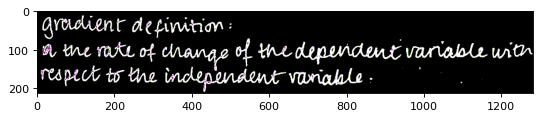

In [18]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

def preprocessImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower = np.array([0,0,0])
    upper = np.array([179, 255, 209])
    mask = cv2.inRange(image, lower, upper)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)
    image[close==0] = (255,255,255)
    retouch_mask = (image <= [250.,250.,250.]).all(axis=2)
    image[retouch_mask] = [0,0,0]
    image = 255-image
    return image

img = cv2.imread('./images2.png')
plt.figure(figsize=(8, 6), dpi=80)
img = preprocessImage(img)
plt.imshow(img)
plt.show()

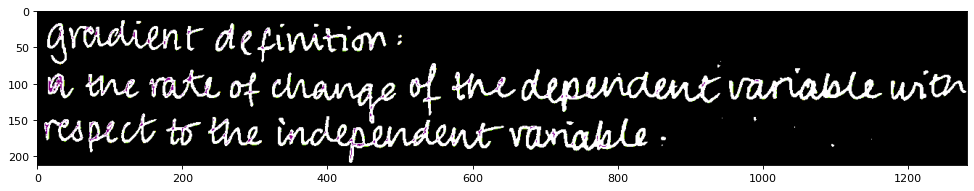

In [21]:
img = cv2.imread('./images2.png')
img = preprocessImage(img)
plt.figure(figsize=(15, 10), dpi=80)
plt.imshow(img)
plt.show()